In [1]:
import pandas as pd
import plotnine as p9
import numpy as np
import scanpy as sc

In [2]:
p9.options.dpi=300
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype']='none'

In [4]:
barnyard_OAK1_adata=sc.read_h5ad(data_dir+'/barnyard_OAK150kali1/adata_raw.h5ad')

In [5]:
K562_OAK1_adata=barnyard_OAK1_adata[barnyard_OAK1_adata.obs.call.isin(['GRCh38']),barnyard_OAK1_adata.var.species.isin(['GRCh38'])]

In [6]:
df_geneSummary_K562_OAK1=pd.DataFrame(columns=['nUMI_Mean_OAK1'],index=K562_OAK1_adata.var.gene_id)

In [7]:
df_geneSummary_K562_OAK1['nUMI_Mean_OAK1']=K562_OAK1_adata.X.mean(axis=0).tolist()[0] 

In [8]:
df_geneSummary_K562_OAK1['nUMI_Sum_OAK1']=K562_OAK1_adata.X.sum(axis=0).tolist()[0] 

In [9]:
barnyard_NextGEM3p_adata=sc.read_h5ad(data_dir+'/barnyard_10x/Downsampling/adata.h5ad')

In [10]:
barnyard_NextGEM3p_adata.var[['species','gene_id']]=barnyard_NextGEM3p_adata.var.iloc[:,0].str.split("_",expand=True) 

In [11]:
barnyard_NextGEM3p_adata_matchsize=sc.pp.subsample(barnyard_NextGEM3p_adata,n_obs=3647,copy=True)

In [12]:
df_geneSummary_K562_NextGEM3p=pd.DataFrame(columns=['nUMI_Mean_NextGEM3p'],index=barnyard_NextGEM3p_adata_matchsize.var.gene_id)

In [13]:
df_geneSummary_K562_NextGEM3p.nUMI_Mean_NextGEM3p=barnyard_NextGEM3p_adata_matchsize.X.mean(axis=0)

In [14]:
df_geneSummary_K562_NextGEM3p['nUMI_Sum_NextGEM3p']=barnyard_NextGEM3p_adata_matchsize.X.sum(axis=0)

In [15]:
df_geneSummary=df_geneSummary_K562_OAK1.reset_index().merge(df_geneSummary_K562_NextGEM3p,how="left",left_on=['gene_id'],right_on=["gene_id"]).set_index('gene_id') 

In [16]:
df_geneSummary[['nUMI_Mean_NextGEM3p','nUMI_Mean_OAK1']].corr(method="spearman")

,nUMI_Mean_NextGEM3p,nUMI_Mean_OAK1
nUMI_Mean_NextGEM3p,1.000000,0.917003
nUMI_Mean_OAK1,0.917003,1.000000


In [18]:
df_geneSummary[['nUMI_Mean_OAK1','nUMI_Mean_NextGEM3p']].to_csv('SupFig1i.csv',header=True,index=True)

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


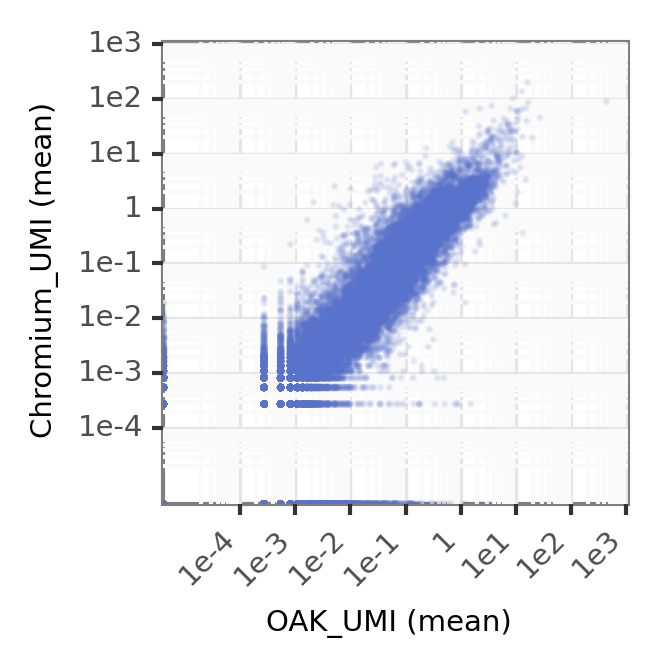

<ggplot: (2932176906322)>

In [23]:
plot=p9.ggplot(data=df_geneSummary,
               mapping=p9.aes(x='nUMI_Mean_OAK1',y='nUMI_Mean_NextGEM3p')
              )
plot+ p9.geom_point(size=0.01,alpha=0.1,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scales.scale_y_log10(limits=[0.00001,450],breaks=[1e-4,1e-3,0.01,0.1,1,10,100,1000,10000]) \
+ p9.scales.scale_x_log10(limits=[0.00001,450],breaks=[1e-4,1e-3,0.01,0.1,1,10,100,1000,10000]) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.xlab('OAK_UMI (mean)') \
+ p9.ylab('Chromium_UMI (mean)') \
+ p9.theme(figure_size=(2, 2),text=p9.element_text(size=7)) 

In [24]:
plot=p9.ggplot(data=df_geneSummary,
               mapping=p9.aes(x='nUMI_Mean_OAK1',y='nUMI_Mean_NextGEM3p')
              )
pl=plot+ p9.geom_point(size=0.01,alpha=0.1,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.scales.scale_y_log10(limits=[0.00001,450],breaks=[1e-4,1e-3,0.01,0.1,1,10,100,1000,10000]) \
+ p9.scales.scale_x_log10(limits=[0.00001,450],breaks=[1e-4,1e-3,0.01,0.1,1,10,100,1000,10000]) \
+ p9.theme(axis_text_x=p9.element_text(angle = 45, hjust = 1)) \
+ p9.xlab('OAK_UMI (mean)') \
+ p9.ylab('Chromium_UMI (mean)') \
+ p9.theme(figure_size=(2, 2),text=p9.element_text(size=7)) 
fig=pl.draw()
fig.set_size_inches(2, 2)
points = fig.axes[0].collections[0]
points.set_rasterized(True)
fig.savefig('Gene_correlation.svg',format='svg',dpi=300,bbox_inches='tight')  

/gstore/home/wub31/.conda/envs/py38_Scanpy_expanded/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log10


In [19]:
#random subsampling for 10 times:
df_OAKrecov=pd.DataFrame()
for i in range(10):
    barnyard_NextGEM3p_adata_matchsize_i=sc.pp.subsample(barnyard_NextGEM3p_adata,n_obs=3647,random_state=i,copy=True)
    df_geneSummary_K562_NextGEM3p_i=pd.DataFrame(columns=['nUMI_Sum_NextGEM3p'],index=barnyard_NextGEM3p_adata_matchsize_i.var.gene_id)
    df_geneSummary_K562_NextGEM3p_i['nUMI_Sum_NextGEM3p']=barnyard_NextGEM3p_adata_matchsize_i.X.sum(axis=0)
    df_geneSummary_i=df_geneSummary_K562_OAK1.reset_index().merge(df_geneSummary_K562_NextGEM3p_i,how="left",left_on=['gene_id'],right_on=["gene_id"]).set_index('gene_id') 
    df_gene_quantile_i=df_geneSummary_i.loc[df_geneSummary_i['nUMI_Sum_NextGEM3p']>0,]
    df_gene_quantile_i['decile']=pd.qcut(df_gene_quantile_i['nUMI_Sum_NextGEM3p'],10,labels=False)
    NextGEM_pos_count_i=df_gene_quantile_i.groupby('decile')['decile'].count()
    df_OAKrecov_i=NextGEM_pos_count_i.to_frame()
    df_gene_quantile_i['detected_in_OAK']=(df_gene_quantile_i['nUMI_Sum_OAK1']>0)
    df_OAKrecov_i['OAK_detected']=df_gene_quantile_i.groupby('decile')['detected_in_OAK'].sum()
    df_OAKrecov_i.columns=['gene_in_bin','OAK_detected']
    df_OAKrecov_i['OAK_percent']=(df_OAKrecov_i['OAK_detected']/df_OAKrecov_i['gene_in_bin'])*100
    df_OAKrecov_i['decile']=df_OAKrecov_i.index
    df_OAKrecov=pd.concat([df_OAKrecov,df_OAKrecov_i],ignore_index=True)

/local/53418104/ipykernel_20060/3122252907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/local/53418104/ipykernel_20060/3122252907.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/local/53418104/ipykernel_20060/3122252907.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

In [20]:
di = {0: "(0,10%]", 1: "(10%-20%]",2:'(20%-30%]',3:'(30%-40%]',4:'(40%-50%]',5:'(50%-60%]',6:'(60%-70%]',7:'(70%-80%]',8:'(80%-90%]',9:'(90%-100%]'}

In [21]:
df_OAKrecov['bin']=df_OAKrecov['decile'].replace(di,inplace=False)

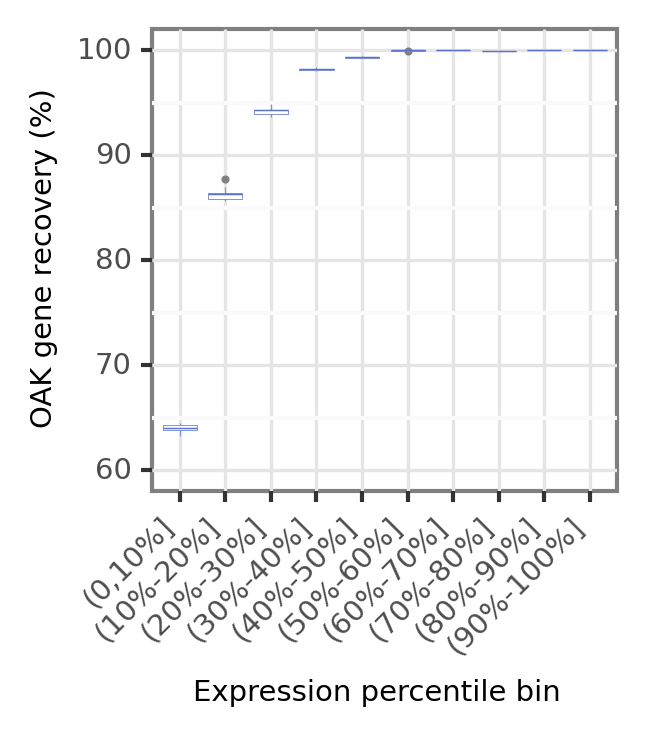

<ggplot: (2932176369396)>

In [22]:
plot=p9.ggplot(data=df_OAKrecov,
               mapping=p9.aes(x='bin',y='OAK_percent')
              )
plot+ p9.geom_boxplot(outlier_color='grey',outlier_size=0.1,size=0.1,color='#5972CB') \
+ p9.themes.theme_bw() \
+ p9.ylim(60,100) \
+ p9.theme(figure_size=(2, 2),axis_text_x=p9.element_text(rotation = 45, hjust=1),text=p9.element_text(size=7)) \
+ p9.labels.xlab('Expression percentile bin') \
+ p9.labels.ylab('OAK gene recovery (%)')

In [24]:
pd.set_option('display.max_rows', 500)

In [25]:
df_OAKrecov

,gene_in_bin,OAK_detected,OAK_percent,decile,bin
0,3781,2414,63.845544,0,"(0,10%]"
1,1671,1444,86.415320,1,(10%-20%]
2,2069,1951,94.296762,2,(20%-30%]
3,2518,2470,98.093725,3,(30%-40%]
4,2420,2404,99.338843,4,(40%-50%]
5,2485,2485,100.000000,5,(50%-60%]
6,2493,2493,100.000000,6,(60%-70%]
7,2484,2483,99.959742,7,(70%-80%]
8,2490,2490,100.000000,8,(80%-90%]
9,2490,2490,100.000000,9,(90%-100%]


In [36]:
plot=p9.ggplot(data=df_OAKrecov,
               mapping=p9.aes(x='bin',y='OAK_percent')
              )
pl=plot+ p9.geom_boxplot(outlier_color='grey',outlier_size=0.1,size=0.1,color='#003C30') \
+ p9.themes.theme_bw() \
+ p9.ylim(60,100) \
+ p9.theme(figure_size=(2, 2),axis_text_x=p9.element_text(rotation = 45, hjust=1),text=p9.element_text(size=7)) \
+ p9.labels.xlab('Expression percentile bin') \
+ p9.labels.ylab('OAK gene recovery (%)')
fig=pl.draw()
fig.set_size_inches(2, 2)
fig.savefig('OAK_gene_recovery.svg',format='svg',dpi=300,bbox_inches='tight')  